In [1]:
#First import warnings
import warnings
#run block of code and catch warnings
with warnings.catch_warnings():
#ignore all caught warnings
    warnings.filterwarnings("ignore")
#execute code that will generate warnings
#import warnings filter
from warnings import simplefilter
#ignore all future warnings
simplefilter(action='ignore',category=FutureWarning)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#Algorithm libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#Ensembling techniques
from sklearn.EL import AdaBoostClassifier
from sklearn.EL import GradientBoostingClassifier
from sklearn.EL import RandomForestClassifier
from sklearn.EL import ExtraTreesClassifier

#Miscelleneous concepts
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [3]:
#Load the data and assign names for it
import pandas
url="D:\Iris.csv"
dataset=pd.read_csv(url)
print(dataset)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

In [5]:
#finding the data type of the data sets
print(dataset.dtypes)

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


In [6]:
#Lambda function to check if any values are missing
dataset.apply(lambda x:sum(x.isnull()),axis=0)

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [14]:
#Inoder to classify the information we need to encode to integer values so using
#labelEncoder
from sklearn.preprocessing import LabelEncoder
L=LabelEncoder()
dataset['Id']=L.fit_transform(dataset['Id'])
dataset['SepalLengthCm']=L.fit_transform(dataset['SepalLengthCm'])
dataset['SepalWidthCm']=L.fit_transform(dataset['SepalWidthCm'])
dataset['PetalLengthCm']=L.fit_transform(dataset['PetalLengthCm'])
dataset['PetalWidthCm']=L.fit_transform(dataset['PetalWidthCm'])
dataset['Species']=L.fit_transform(dataset['Species'])
print(dataset)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0      0              8            14              4             1        0
1      1              6             9              4             1        0
2      2              4            11              3             1        0
3      3              3            10              5             1        0
4      4              7            15              4             1        0
..   ...            ...           ...            ...           ...      ...
145  145             24             9             28            19        2
146  146             20             4             26            15        2
147  147             22             9             28            16        2
148  148             19            13             30            19        2
149  149             16             9             27            14        2

[150 rows x 6 columns]


In [15]:
#checking whether the values converted to integer or not
print(dataset.dtypes)

Id               int64
SepalLengthCm    int64
SepalWidthCm     int64
PetalLengthCm    int64
PetalWidthCm     int64
Species          int32
dtype: object


In [18]:
#as the dataset that retrevied at Line[3] are of groups of some species 
# to find the size of species group
print(dataset.groupby('Species').size())

Species
0    50
1    50
2    50
dtype: int64


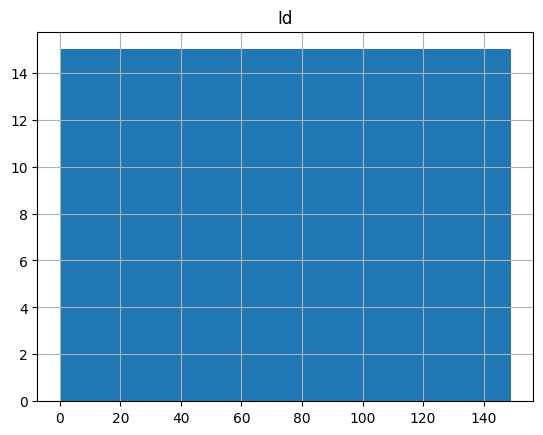

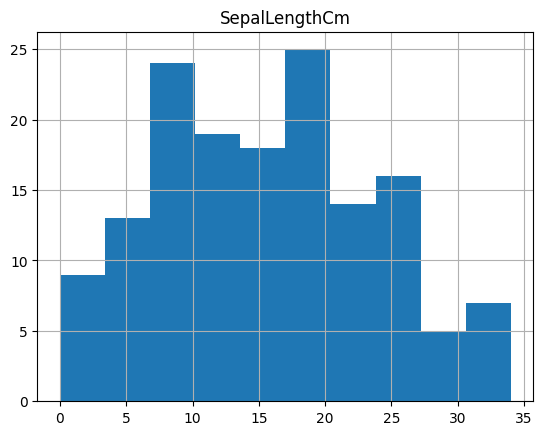

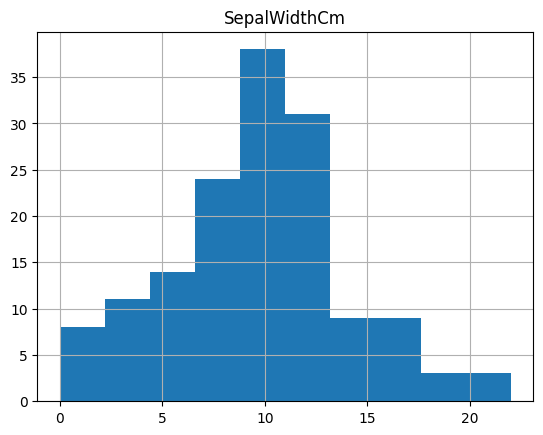

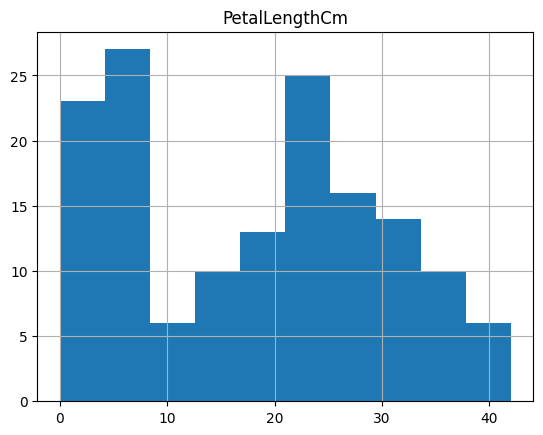

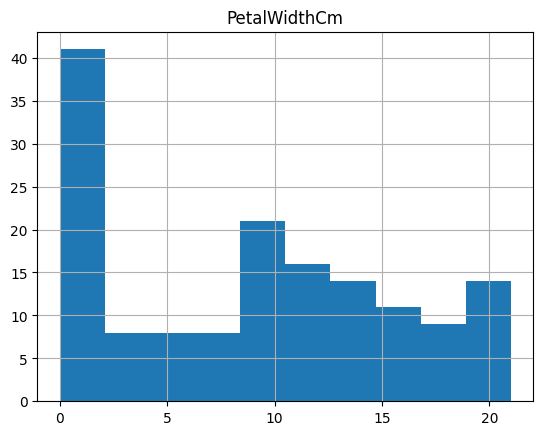

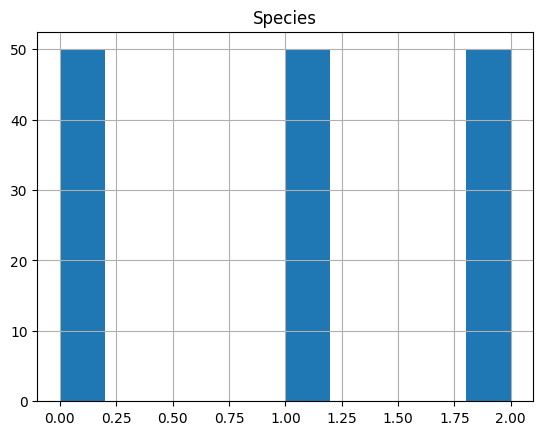

In [54]:
hist1=dataset.hist('Id')
hist2=dataset.hist('SepalLengthCm')
hist3=dataset.hist('SepalWidthCm')
hist4=dataset.hist('PetalLengthCm')
hist5=dataset.hist('PetalWidthCm')
hist6=dataset.hist('Species')
plt.show()

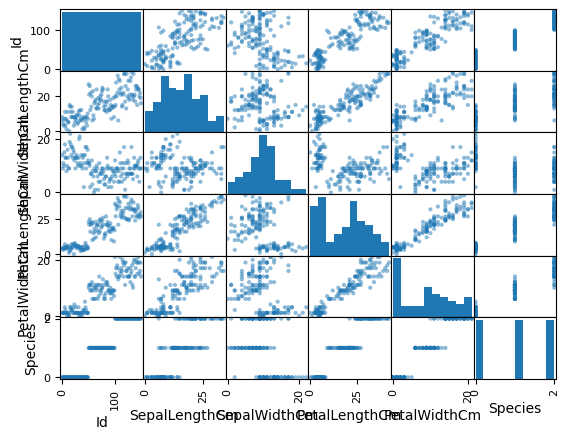

In [24]:
scatter_matrix(dataset)
plt.show()

In [31]:
arr=dataset.values
X=arr[:,0:5]
Y=arr[:,5]
test_size=0.35
seed=7
num_samples=150
num_instances=len(X)
models=[]
models.append(("LR",LogisticRegression()))
models.append(("LDA",LinearDiscriminantAnalysis()))
models.append(("KNN",KNeighborsClassifier()))
models.append(("DT",DecisionTreeClassifier()))
models.append(("GNB",GaussianNB()))
models.append(("SVM",SVC()))
results=[]
names=[]
scoring='accuracy' #because classification deals with accuracy
for name,model in models:
    kfold=model_selection.ShuffleSplit(n_splits=15,test_size=test_size,random_state=seed)
    cv_results=model_selection.cross_val_score(model,X,Y,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    message="%s : %f (%f)"%(name,cv_results.mean()*100,cv_results.std())
    print(message)

C:\Users\Santhoshi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Santhoshi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

LR : 98.113208 (0.018228)
LDA : 100.000000 (0.000000)
KNN : 99.245283 (0.009243)
DT : 98.238994 (0.012828)
GNB : 98.867925 (0.011528)
SVM : 99.371069 (0.008894)


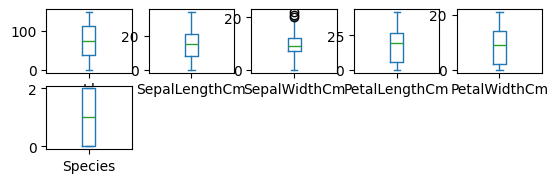

In [28]:
dataset.plot(kind='box',subplots=True,layout=(5,5))
plt.show()


In [29]:
# so in SepalWidthCm there's a highest value 
#understood by observing the black portion in box plot 

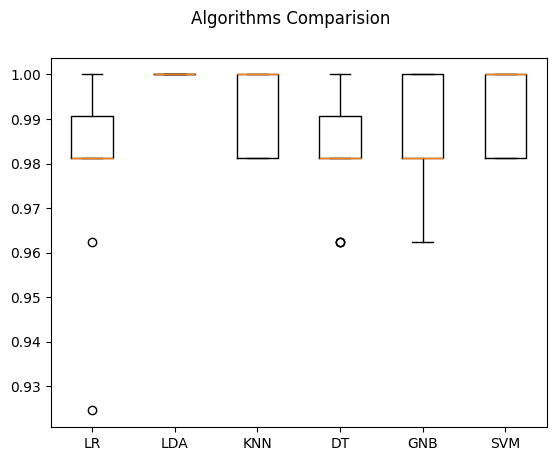

In [44]:
#algorithm comparions
f=plt.figure()
f.suptitle("Algorithms Comparision")
ax=f.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [45]:
 
PL=[]
PL.append(("ScalerLR",Pipeline([("Scaler",StandardScaler()),('LR',LogisticRegression())])))
PL.append(("ScalerLDA",Pipeline([("Scaler",StandardScaler()),("LDA",LinearDiscriminantAnalysis())])))
PL.append(("ScalerKNN",Pipeline([('Scaler',StandardScaler()),("KNN",KNeighborsClassifier())])))
PL.append(("ScalerDT",Pipeline([("Scaler",StandardScaler()),("DT",DecisionTreeClassifier())])))
PL.append(("ScalerGNB",Pipeline([("Scaler",StandardScaler()),("GNB",GaussianNB())])))
PL.append(("ScalerSVM",Pipeline([("Scaler",StandardScaler()),("SVM",SVC())])))
names=[]
results=[]
test_size=0.33
seed=8
scoring='accuracy'
for name,model in PL:
    kfold=model_selection.ShuffleSplit(n_splits=15,test_size=test_size,random_state=seed)
    cv_results=model_selection.cross_val_score(model,X,Y,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg=" %s:%f(%f)"%(name,cv_results.mean()*100,cv_results.std())
    print(msg)

 ScalerLR:98.933333(0.014360)
 ScalerLDA:99.866667(0.004989)
 ScalerKNN:98.800000(0.017588)
 ScalerDT:99.600000(0.008000)
 ScalerGNB:99.200000(0.009798)
 ScalerSVM:99.066667(0.012365)


In [48]:
#GridSearchCV by knn
scaler=StandardScaler().fit(X)
scalerX=scaler.transform(X)
neighbors=[1,3,5,7,9]
param_grid=dict(n_neighbors=neighbors)
model=KNeighborsClassifier()
kfold=model_selection.ShuffleSplit(n_splits=10,test_size=test_size,random_state=seed)
grid=GridSearchCV(estimator=model,param_grid=param_grid,scoring=scoring,cv=kfold)
grid_results=grid.fit(scalerX,Y)
print("Best : %f using %s" % (grid_results.best_score_,grid_results.best_params_))

Best : 0.988000 using {'n_neighbors': 3}


In [50]:
#ensembling techniques
from sklearn.ensemble import AdaBoostClassifier
EL=[]
EL.append(('AB',AdaBoostClassifier()))
EL.append(('GBM',GradientBoostingClassifier()))
EL.append(('RF',RandomForestClassifier()))
EL.append(('ET',ExtraTreesClassifier()))
results=[]
names=[]
for name,model in EL:
    kfold=model_selection.ShuffleSplit(n_splits=10,test_size=test_size,random_state=seed)
   # X_train,X_test,Y_train,Y_test=model_selection.train_test_split(X,Y,random_state=None)
    cv_results=model_selection.cross_val_score(model,X,Y,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg="%s:%f(%f)"%(name,cv_results.mean()*100,cv_results.std())
    print(msg)

AB:99.600000(0.012000)
GBM:99.800000(0.006000)
RF:99.000000(0.010000)
ET:99.000000(0.010000)


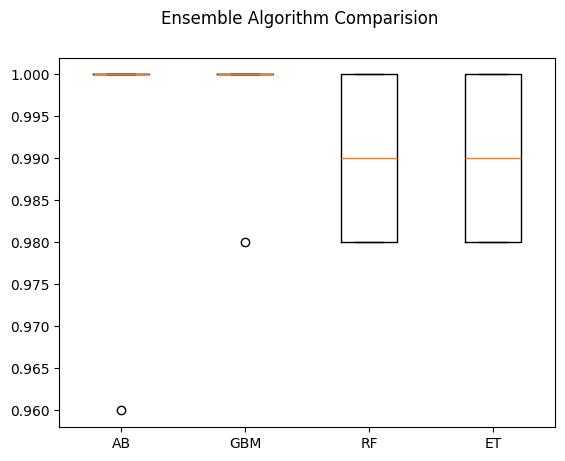

In [51]:
f=plt.figure()
f.suptitle('Ensemble Algorithm Comparision')
ax=f.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [52]:
#final algorithm LDA(because the accuracy for this algorithm is the best)
scaler=StandardScaler().fit(X)
rescaledX=scaler.transform(X)
model=LinearDiscriminantAnalysis()
model.fit(rescaledX,Y)
rescaledValidationX=scaler.transform(X)
predictions=model.predict(rescaledValidationX)
print(accuracy_score(Y,predictions))
print(confusion_matrix(Y,predictions))
print(classification_report(Y,predictions))

1.0
[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150

